In [108]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
sns.set_theme(style="ticks")
import matplotlib.pyplot as plt
#import community
from networkx.algorithms.community import greedy_modularity_communities
#import community.community_louvain as cl
import pandas as pd
import scipy.stats as stats
import networkx as nx
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [109]:
df_wisconsin_sim = pd.read_csv('wisconsin_cosine_weights.csv')

In [110]:
df_wisconsin = df_wisconsin_sim[['source','target','weight']]
df_wisconsin['weight']= 1 - df_wisconsin['weight']
#df_wisconsin_sim['weight']= 1 / df_wisconsin_sim['weight']
df_wisconsin.head()

,source,target,weight
0,0,20,0.121278
1,0,28,0.082160
2,0,99,0.708627
3,0,104,0.435828
4,0,200,0.050651


In [111]:
df_nodes=pd.read_csv('wisconsin_labels.csv')

In [112]:
#scaler = MinMaxScaler(feature_range=(0, 1)) #
#df_wisconsin['weight'] = scaler.fit_transform(df_wisconsin[['weight']])#
#df_wisconsin.head()

In [113]:
df_wisconsin.describe()

,source,target,weight
count,450.000000,450.000000,450.000000
mean,81.231111,158.624444,0.606098
std,53.359769,58.042944,0.279774
min,0.000000,7.000000,0.020877
25%,37.000000,102.000000,0.424982
50%,79.000000,168.000000,0.703163
75%,104.000000,205.000000,0.832031
max,242.000000,250.000000,0.965625


In [114]:
wisconsin_graph= nx.from_pandas_edgelist(df_wisconsin, 'source', 'target', create_using=nx.DiGraph())

In [115]:
wisconsin_graph.number_of_edges()

450

In [116]:
GNN_dist= nx.from_pandas_edgelist(df_wisconsin, 'source', 'target', edge_attr='weight', 
                             create_using=nx.DiGraph())

In [117]:
GNN_sim= nx.from_pandas_edgelist(df_wisconsin_sim, 'source', 'target', edge_attr='weight', 
                             create_using=nx.DiGraph())

# Degree Centrality

## GNN_wisconsin

In [118]:
# Calculate the weighted degree centrality
def weighted_out_degree(G):
  # Calcolo della weighted out-degree centrality
  out_degrees = dict(G.out_degree(weight='weight'))
  max_weight = max(out_degrees.values())
  weighted_out_degrees = {node: (degree / max_weight) for node, degree in out_degrees.items()}

  # Calcolo della somma delle weighted out-degree centralities
  total_weighted_out_degree = sum(weighted_out_degrees.values())

  # Normalizzazione della weighted out-degree centrality
  weighted_out_degree_centrality_normalized = {node: (degree / total_weighted_out_degree) for node, degree in weighted_out_degrees.items()}
  return dict(sorted(weighted_out_degree_centrality_normalized.items(), key=lambda x: x[1], reverse=True))
# Print the result

def weighted_in_degree(G):
  in_degrees = dict(G.in_degree(weight='weight'))
  max_weight = max(in_degrees.values())
  weighted_in_degrees = {node: (degree / max_weight) for node, degree in in_degrees.items()}

  # Calcolo della somma delle weighted in-degree centralities
  total_weighted_in_degree = sum(weighted_in_degrees.values())

  # Normalizzazione della weighted in-degree centrality
  weighted_in_degree_centrality_normalized = {node: (degree / total_weighted_in_degree) for node, degree in weighted_in_degrees.items()}

  return dict(sorted(weighted_in_degree_centrality_normalized.items(), key=lambda x: x[1], reverse=True))

In [119]:
GNN_dist_out_degree = weighted_out_degree(GNN_dist)
GNN_dist_in_degree = weighted_in_degree(GNN_dist)

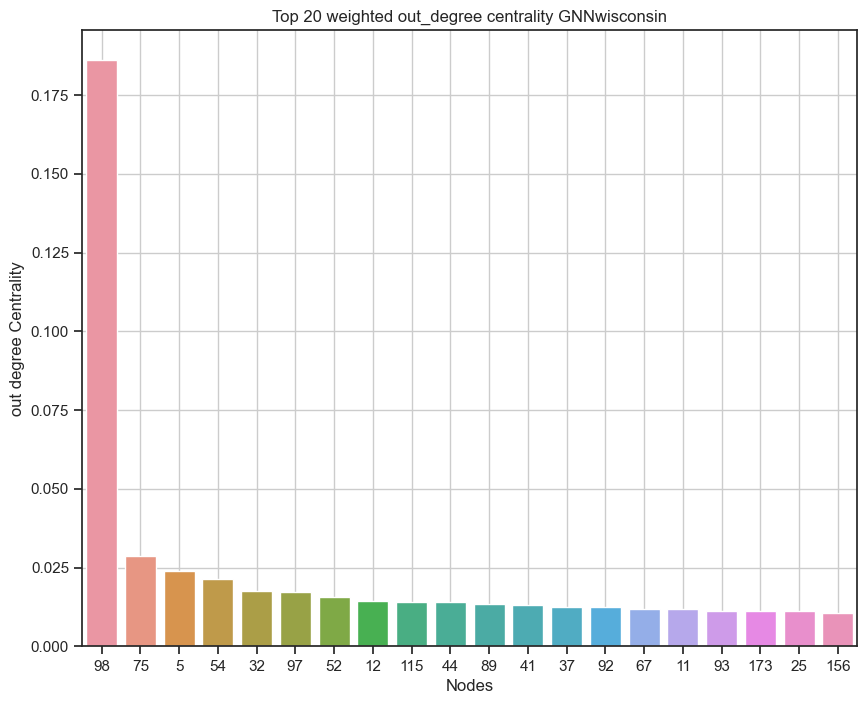

In [120]:
keys = list(map(str,list(GNN_dist_out_degree.keys())[:20]))
values = list(GNN_dist_out_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes')
plt.ylabel('out degree Centrality')
plt.title('Top 20 weighted out_degree centrality GNNwisconsin')
plt.grid()
plt.show()

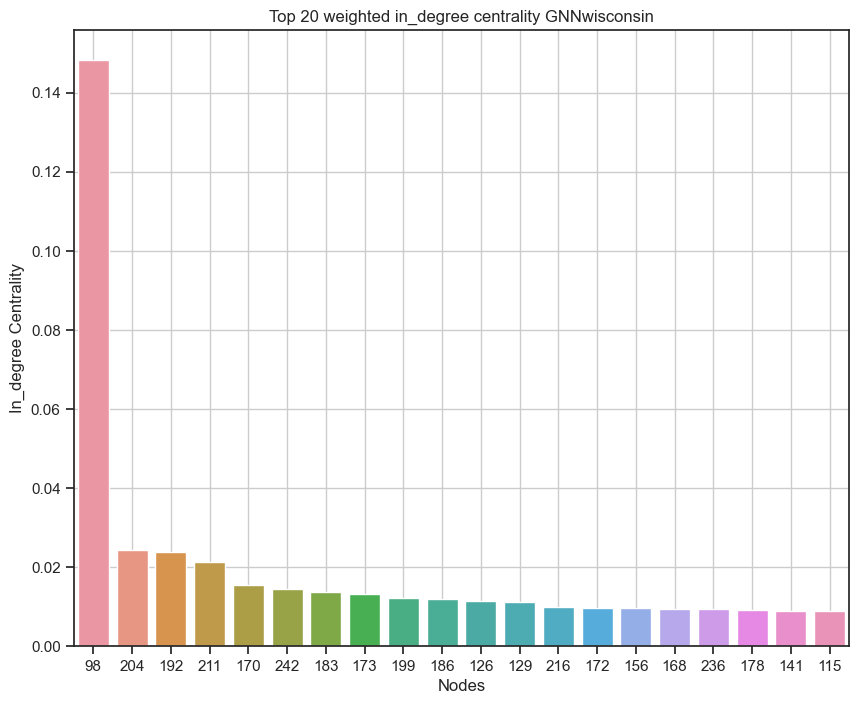

In [121]:
keys = list(map(str,list(GNN_dist_in_degree.keys())[:20]))
values = list(GNN_dist_in_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes')
plt.ylabel('In_degree Centrality')
plt.title('Top 20 weighted in_degree centrality GNNwisconsin')
plt.grid()
plt.show()

## wisconsin graph

In [122]:
wisconsin_out_degree = weighted_out_degree(wisconsin_graph)
wisconsin_in_degree = weighted_in_degree(wisconsin_graph)

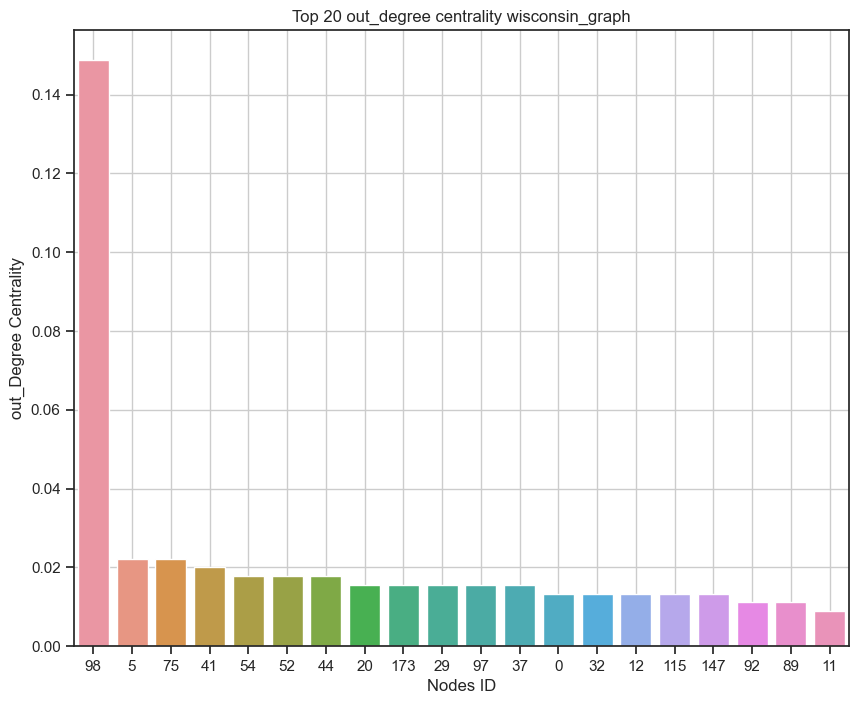

In [123]:

keys = list(map(str,list(wisconsin_out_degree.keys())[:20]))
values = list(wisconsin_out_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('out_Degree Centrality')
plt.title('Top 20 out_degree centrality wisconsin_graph')
plt.grid()
plt.show()

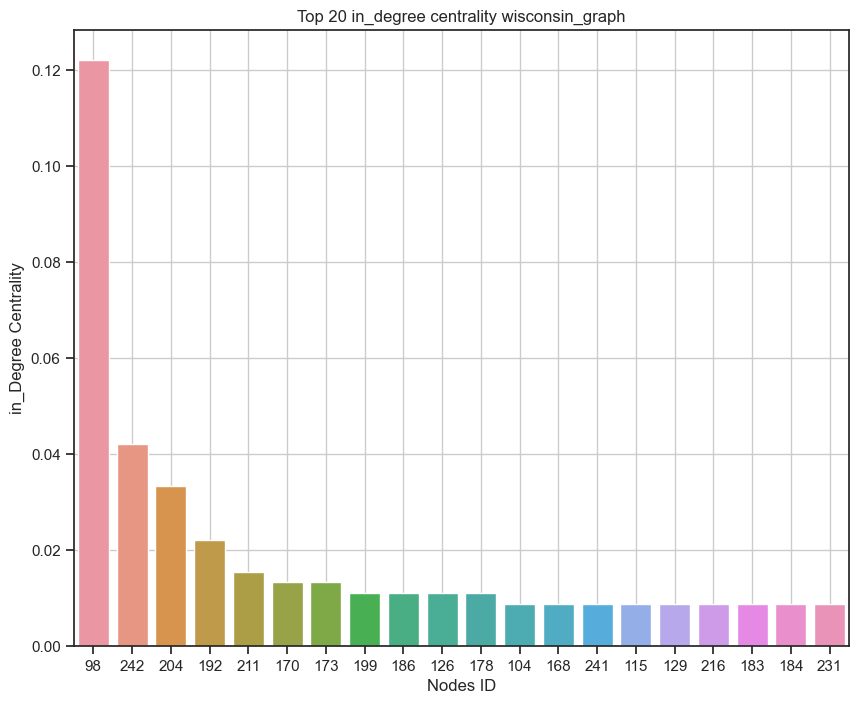

In [124]:
keys = list(map(str,list(wisconsin_in_degree.keys())[:20]))
values = list(wisconsin_in_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('in_Degree Centrality')
plt.title('Top 20 in_degree centrality wisconsin_graph')
plt.grid()
plt.show()

# Betweeness centrality

## GNN_wisconsin

In [125]:
#questa centralità interpreta i pesi come distanza
GNN_betweeness = nx.betweenness_centrality(GNN_dist, weight = 'weight')

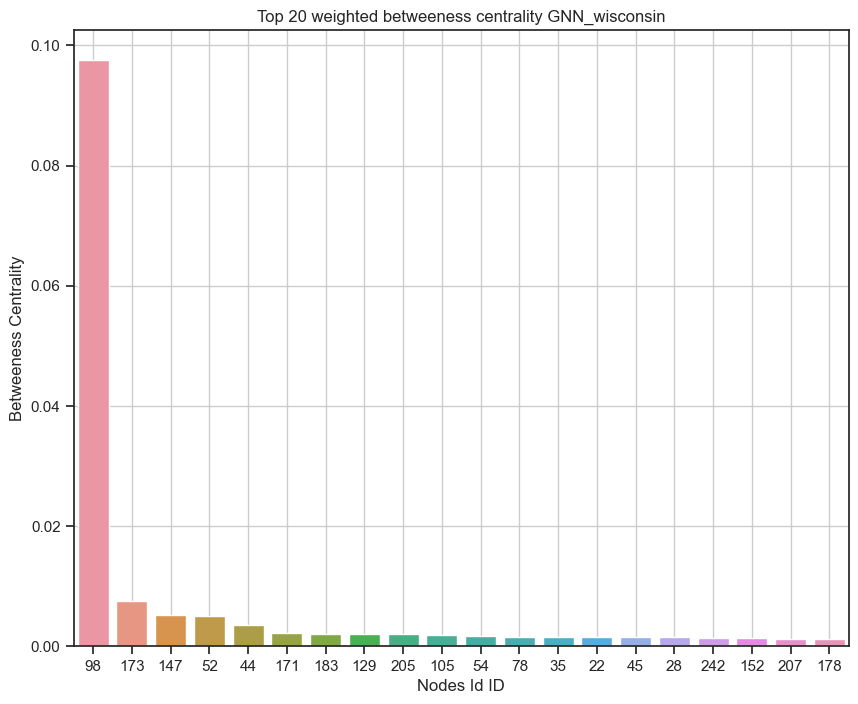

In [126]:
GNN_betweeness = dict(sorted(GNN_betweeness.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(GNN_betweeness.keys())[:20]))
values = list(GNN_betweeness.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes Id ID')
plt.ylabel('Betweeness Centrality')
plt.title('Top 20 weighted betweeness centrality GNN_wisconsin')
plt.grid()
plt.show()

## wisconsin graph

In [127]:
bet_wisconsin_graph = nx.betweenness_centrality(wisconsin_graph)

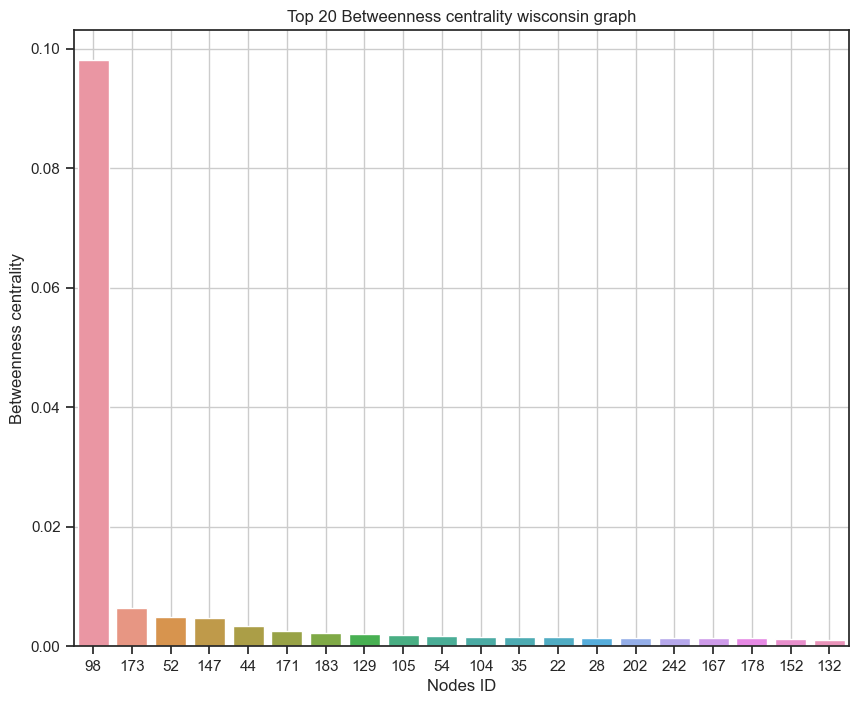

In [128]:
bet_wisconsin_graph = dict(sorted(bet_wisconsin_graph.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(bet_wisconsin_graph.keys())[:20]))
values = list(bet_wisconsin_graph.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Betweenness centrality')
plt.title('Top 20 Betweenness centrality wisconsin graph')
plt.grid()
plt.show()

# Closeness Centrality

## GNN_wisconsin

In [129]:
#questa centralità interpreta i pesi come distanza
GNN_closeness = nx.closeness_centrality(GNN_dist, distance = 'weight')

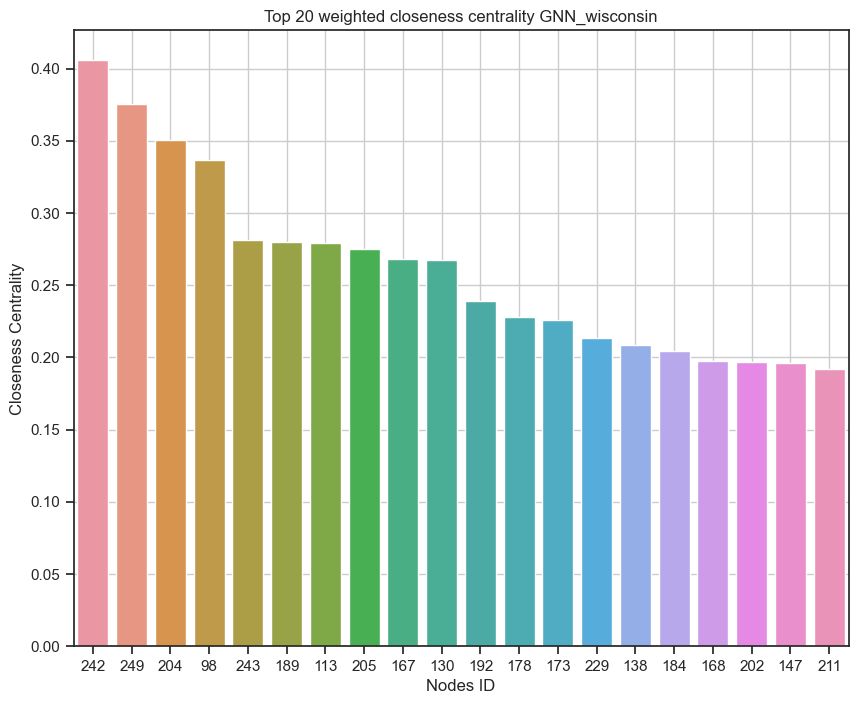

In [130]:
GNN_closeness = dict(sorted(GNN_closeness.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(GNN_closeness.keys())[:20]))
values = list(GNN_closeness.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Closeness Centrality')
plt.title('Top 20 weighted closeness centrality GNN_wisconsin')
plt.grid()
plt.show()

## wisconsin

In [131]:
closeness_wisconsin_graph = nx.closeness_centrality(wisconsin_graph)

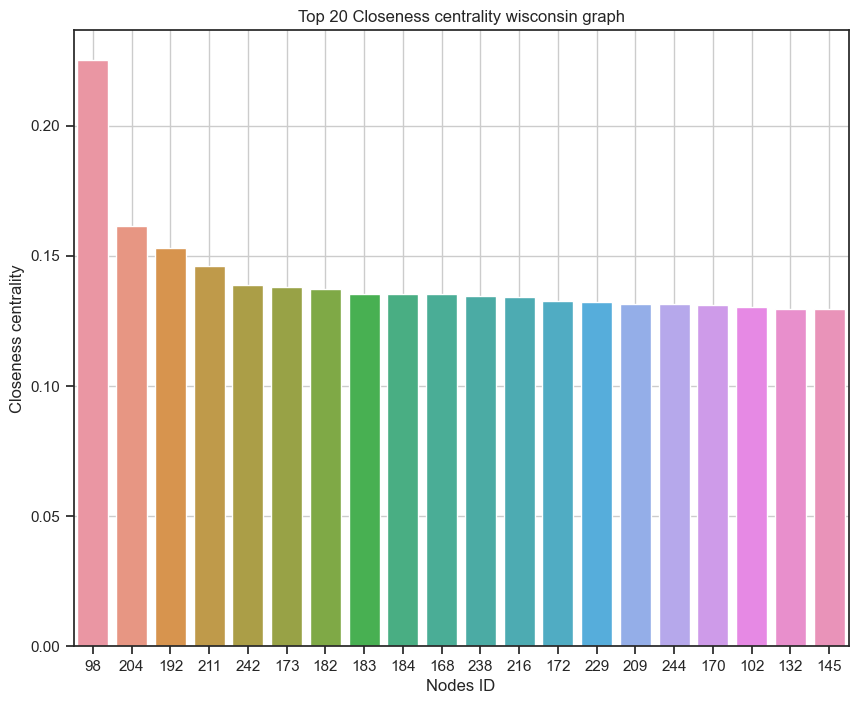

In [132]:
closeness_wisconsin_graph = dict(sorted(closeness_wisconsin_graph.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(closeness_wisconsin_graph.keys())[:20]))
values = list(closeness_wisconsin_graph.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Closeness centrality')
plt.title('Top 20 Closeness centrality wisconsin graph')
plt.grid()
plt.show()

# Eigenvectror Centrality

## GNN_wisconsin

In [133]:
GNN_eigenvector = nx.eigenvector_centrality(GNN_sim, weight = 'weight', max_iter = 2000)

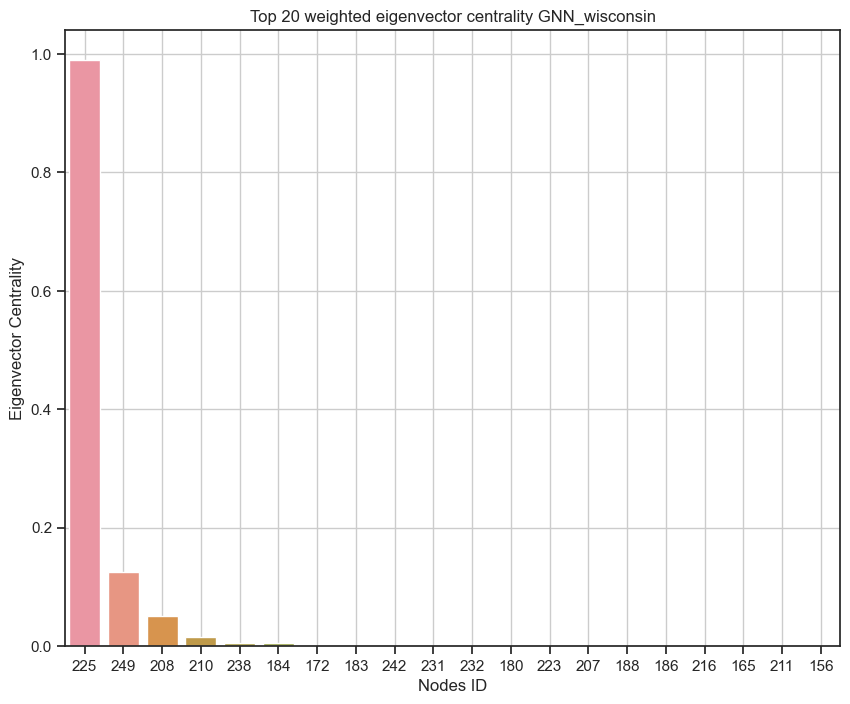

In [134]:
GNN_eigenvector = dict(sorted(GNN_eigenvector.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(GNN_eigenvector.keys())[:20]))
values = list(GNN_eigenvector.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Eigenvector Centrality')
plt.title('Top 20 weighted eigenvector centrality GNN_wisconsin')
plt.grid()
plt.show()

## wisconsin graph

In [135]:
eigen_wisconsin_graph = nx.eigenvector_centrality(wisconsin_graph, max_iter = 1000)

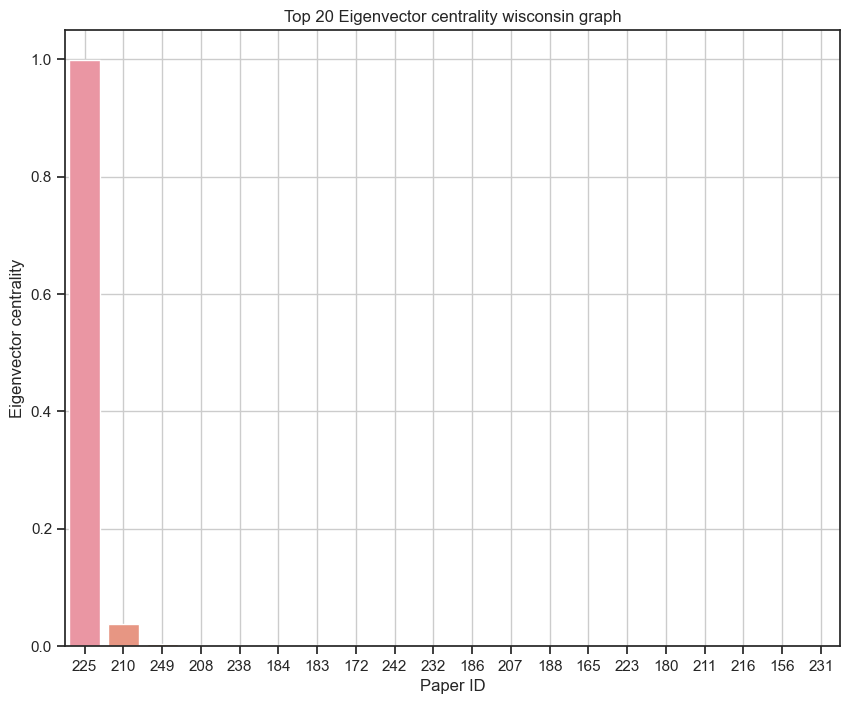

In [136]:
eigen_wisconsin_graph = dict(sorted(eigen_wisconsin_graph.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(eigen_wisconsin_graph.keys())[:20]))
values = list(eigen_wisconsin_graph.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Paper ID')
plt.ylabel('Eigenvector centrality')
plt.title('Top 20 Eigenvector centrality wisconsin graph')
plt.grid()
plt.show()

# Efficiency

In [137]:
# Calculate the weighted global efficiency
def weighted_global_efficiency(G):
  weighted_efficiency = 0
  for node in G.nodes():
      shortest_paths = nx.shortest_path_length(G, source=node, weight='weight')
      efficiency = sum([1.0 / d for d in shortest_paths.values() if d > 0])
      weighted_efficiency += efficiency

  weighted_efficiency /= (len(G) * (len(G) - 1))
  return round(weighted_efficiency, 3)

In [138]:
#efficiency sulla rete vista dalla GNN
weighted_global_efficiency(GNN_dist)

0.098

In [139]:
weighted_global_efficiency(wisconsin_graph)

0.051

## Modularity

In [140]:

def weighted_modularty(G):
  # Compute the partition of the graph using the Louvain method
  partition = greedy_modularity_communities(G, weight='weight')

  # Compute the modularity of the partition using the Louvain method
  modularity = nx.algorithms.community.quality.modularity(G, partition, weight='weight')
  return round(modularity, 3)

In [141]:
print(weighted_modularty(GNN_sim))

0.699


In [142]:
print(weighted_modularty(wisconsin_graph))

0.626


# Community

In [143]:
#define Jaccard Similarity function
def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

comm_GNN = greedy_modularity_communities(GNN_sim, weight='weight')
comm_wisconsin = greedy_modularity_communities(wisconsin_graph)

In [144]:
print(len(comm_GNN))
print(len(comm_wisconsin))

14
11


In [161]:
for c in range(len(comm_wisconsin)):
    print(len(comm_GNN[c]),len(comm_wisconsin[c]),jaccard(comm_GNN[c], comm_wisconsin[c]))

51 61 0.7777777777777778
40 42 0.0
31 36 0.0
25 21 0.0
22 21 0.0
15 20 0.0
15 16 0.0
12 14 0.0
8 8 1.0
8 7 0.0
7 5 0.0


In [145]:
for com in comm_GNN:
    print(len(com))

51
40
31
25
22
15
15
12
8
8
7
6
6
5


In [146]:
for com in comm_wisconsin:
    print(len(com))

61
42
36
21
21
20
16
14
8
7
5


In [147]:
labels = df_nodes['label'].unique()
mapping = {}
for i in range(len(df_nodes)):
  mapping[i] = df_nodes.loc[i]['label']

In [148]:
def gini_index(cluster, labels):
    """
    Calculates the Gini Index for a given cluster of objects and 7 labels.

    Parameters:
        cluster (list): A list of objects in the cluster.
        labels (list): A list of 7 labels.

    Returns:
        float: The Gini Index for the given cluster and labels.
    """
    total_count = len(cluster)
    if total_count == 0:
        return 0.0

    gini_sum = 0.0
    for label in labels:
        label_count = sum([1 for obj in cluster if mapping[obj] == label])
        label_freq = label_count / total_count
        gini_sum += label_freq ** 2

    gini_index = 1.0 - gini_sum  
    return round(gini_index, 3)

In [149]:
import scipy

gini_GNN = [gini_index(i,labels) for i in comm_GNN]
gini_wisconsin = [gini_index(i,labels) for i in comm_wisconsin]
#scipy.stats.wilcoxon(gini_GNN, gini_wisconsin)

In [150]:
print('mannwhitneyu',scipy.stats.mannwhitneyu(gini_GNN, gini_wisconsin))

mannwhitneyu MannwhitneyuResult(statistic=67.0, pvalue=0.6028708020235095)


In [151]:
df_nodes['label'].unique()

array([1, 2, 0, 3, 4], dtype=int64)

<AxesSubplot:>

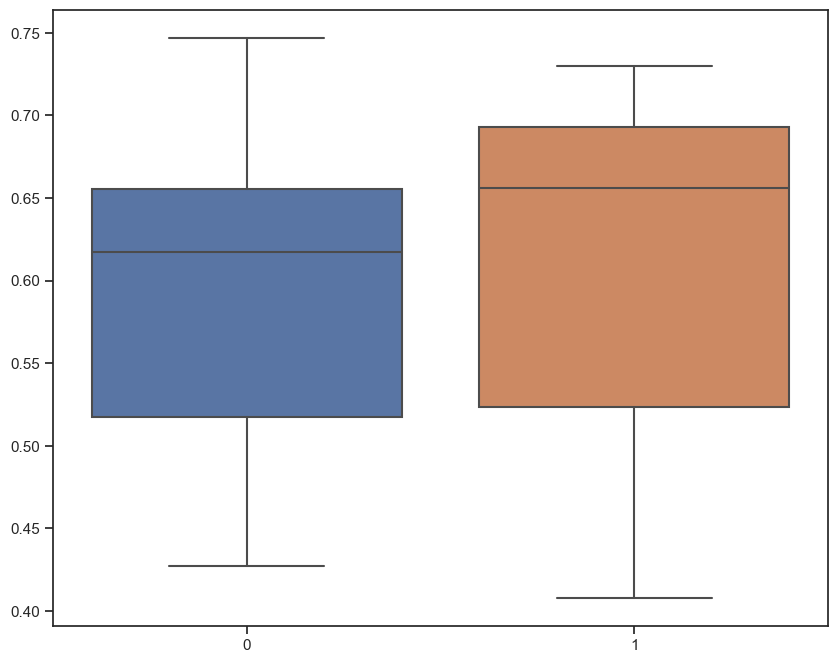

In [152]:
import numpy as np
import seaborn as sns

all_arr = [gini_GNN, gini_wisconsin]

sns.boxplot(data=all_arr, )

In [153]:
gini=0
clusters = comm_GNN
for com in clusters:
  
  gini += gini_index(com, labels)
avg_gini= round(gini/len(clusters), 3)

avg_gini

0.604

In [154]:
gini=0
clusters = comm_wisconsin
for com in clusters:
  
  gini += gini_index(com, labels)
avg_gini= round(gini/len(clusters), 3)

avg_gini

0.613

In [155]:
#out degree
x1 = list(GNN_dist_out_degree.keys())[:100]
x2 = list(wisconsin_out_degree.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
#w_t, w_p = stats.weightedtau(x1,x2) #vedo se considerarlo
print('tau:',tau)
print('p_value',p_value)
#print('w-tau:',w_t)
#print('w-p_value',w_p)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: 0.01696969696969697
p_value 0.8024622175039021
Jaccard Index: 0.7241379310344828
[98, 75, 5, 54, 32, 97, 52, 12, 115, 44, 89, 41, 37, 92, 67, 11, 93, 173, 25, 156, 178, 171, 33, 122, 8, 152, 107, 96, 91, 120, 147, 27, 29, 51, 53, 10, 143, 35, 57, 15, 18, 86, 3, 2, 160, 46, 69, 167, 48, 30, 34, 0, 128, 63, 155, 81, 20, 170, 50, 68, 129, 13, 79, 31, 45, 158, 6, 74, 24, 28, 197, 104, 9, 76, 94, 21, 17, 88, 150, 130, 202, 16, 56, 77, 183, 55, 14, 136, 117, 61, 23, 19, 140, 64, 58, 83, 22, 112, 47, 84]
[98, 5, 75, 41, 54, 52, 44, 20, 173, 29, 97, 37, 0, 32, 12, 115, 147, 92, 89, 11, 25, 63, 79, 31, 50, 178, 57, 67, 156, 171, 93, 128, 28, 3, 45, 6, 8, 107, 152, 35, 27, 69, 33, 53, 34, 51, 122, 46, 68, 91, 96, 167, 120, 104, 2, 4, 81, 170, 201, 10, 13, 197, 15, 18, 21, 24, 26, 30, 38, 129, 48, 49, 86, 155, 160, 78, 74, 84, 202, 143, 148, 150, 158, 200, 7, 1, 66, 101, 168, 242, 9, 87, 47, 58, 64, 14, 186, 16, 17, 130]


In [156]:
#in degree
x1 = list(GNN_dist_in_degree.keys())[:100]
x2 = list(wisconsin_in_degree.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
#w_t, w_p = stats.weightedtau(x1,x2) #vedo se considerarlo
print('tau:',tau)
print('p_value',p_value)
#print('w-tau:',w_t)
#print('w-p_value',w_p)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: -0.10424242424242425
p_value 0.12436476688272464
Jaccard Index: 0.8018018018018018
[98, 204, 192, 211, 170, 242, 183, 173, 199, 186, 126, 129, 216, 172, 156, 168, 236, 178, 141, 115, 246, 104, 231, 163, 217, 145, 87, 244, 182, 229, 97, 238, 160, 203, 44, 139, 241, 206, 195, 202, 245, 152, 153, 102, 64, 127, 123, 146, 99, 175, 157, 132, 114, 54, 144, 111, 124, 189, 191, 159, 52, 171, 223, 155, 184, 232, 209, 135, 121, 197, 208, 225, 190, 207, 188, 165, 147, 101, 138, 230, 161, 243, 130, 151, 198, 205, 249, 193, 187, 212, 174, 213, 106, 239, 107, 227, 109, 62, 77, 134]
[98, 242, 204, 192, 211, 170, 173, 199, 186, 126, 178, 104, 168, 241, 115, 129, 216, 183, 184, 231, 229, 207, 52, 195, 141, 236, 246, 44, 87, 144, 152, 197, 243, 79, 103, 102, 97, 245, 206, 132, 145, 217, 182, 165, 160, 156, 172, 202, 161, 163, 189, 209, 238, 244, 188, 232, 208, 99, 54, 101, 201, 127, 64, 130, 149, 113, 111, 69, 50, 175, 191, 151, 122, 226, 121, 119, 135, 230, 114, 155, 190, 159, 147, 203, 153, 193, 2

In [157]:
#betweennes
x1 = list(GNN_betweeness.keys())[:100]
x2 = list(bet_wisconsin_graph.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
print('tau:',tau)
print('p_value',p_value)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: 0.07757575757575759
p_value 0.25279087011145884
Jaccard Index: 0.8348623853211009
[98, 173, 147, 52, 44, 171, 183, 129, 205, 105, 54, 78, 35, 22, 45, 28, 242, 152, 207, 178, 104, 202, 132, 168, 198, 155, 137, 167, 145, 131, 209, 210, 115, 50, 156, 57, 41, 79, 92, 20, 63, 201, 64, 197, 69, 107, 87, 85, 160, 186, 149, 97, 53, 51, 93, 32, 83, 118, 233, 200, 101, 62, 121, 138, 0, 99, 7, 1, 2, 3, 204, 66, 4, 195, 5, 81, 141, 211, 236, 246, 6, 170, 8, 199, 9, 10, 11, 127, 47, 12, 58, 110, 144, 13, 14, 15, 16, 17, 18, 130]
[98, 173, 52, 147, 44, 171, 183, 129, 105, 54, 104, 35, 22, 28, 202, 242, 167, 178, 152, 132, 198, 155, 137, 145, 209, 210, 32, 45, 168, 131, 170, 205, 156, 109, 57, 115, 50, 97, 41, 20, 92, 63, 64, 79, 197, 160, 201, 186, 93, 107, 149, 51, 53, 87, 83, 118, 78, 233, 207, 69, 101, 200, 7, 62, 121, 85, 138, 122, 81, 130, 140, 112, 70, 71, 86, 114, 190, 0, 99, 1, 2, 3, 204, 66, 4, 195, 5, 141, 211, 236, 246, 6, 8, 199, 9, 10, 11, 127, 47, 12]


In [158]:
#closeness
x1 = list(GNN_closeness.keys())[:20]
x2 = list(closeness_wisconsin_graph.keys())[:20]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
print('tau:',tau)
print('p_value',p_value)
print('Jaccard Index:', j )
print(x1)
print(x2)

tau: 0.06315789473684211
p_value 0.7246362205272814
Jaccard Index: 0.2903225806451613
[242, 249, 204, 98, 243, 189, 113, 205, 167, 130, 192, 178, 173, 229, 138, 184, 168, 202, 147, 211]
[98, 204, 192, 211, 242, 173, 182, 183, 184, 168, 238, 216, 172, 229, 209, 244, 170, 102, 132, 145]


In [159]:
#eigenvector

x1 = list(GNN_eigenvector.keys())[:100]
x2 = list(eigen_wisconsin_graph.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)

print('tau:',tau)
print('p_value',p_value)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: 0.2367676767676768
p_value 0.0004823831375458517
Jaccard Index: 0.9801980198019802
[225, 249, 208, 210, 238, 184, 172, 183, 242, 231, 232, 180, 223, 207, 188, 186, 216, 165, 211, 156, 245, 192, 178, 202, 160, 198, 248, 244, 151, 226, 204, 182, 240, 209, 152, 199, 215, 189, 139, 239, 206, 243, 181, 205, 159, 224, 102, 168, 246, 113, 141, 167, 130, 236, 138, 229, 173, 147, 105, 144, 132, 193, 213, 104, 145, 126, 146, 171, 190, 131, 235, 170, 169, 154, 155, 137, 175, 230, 218, 123, 133, 157, 125, 153, 220, 124, 177, 163, 129, 135, 203, 237, 111, 134, 109, 227, 114, 174, 99, 72]
[225, 210, 249, 208, 238, 184, 183, 172, 242, 232, 186, 207, 188, 165, 223, 180, 211, 216, 156, 231, 245, 204, 192, 244, 182, 243, 189, 209, 139, 202, 205, 178, 226, 248, 159, 152, 181, 240, 199, 206, 198, 160, 151, 215, 224, 239, 168, 141, 236, 246, 102, 173, 126, 229, 135, 230, 132, 193, 213, 163, 170, 129, 114, 155, 190, 104, 124, 144, 145, 99, 130, 113, 111, 175, 147, 203, 153, 123, 171, 138, 146, 157, 105